In [ ]:
!pip install mlflow
!pip install seaborn

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


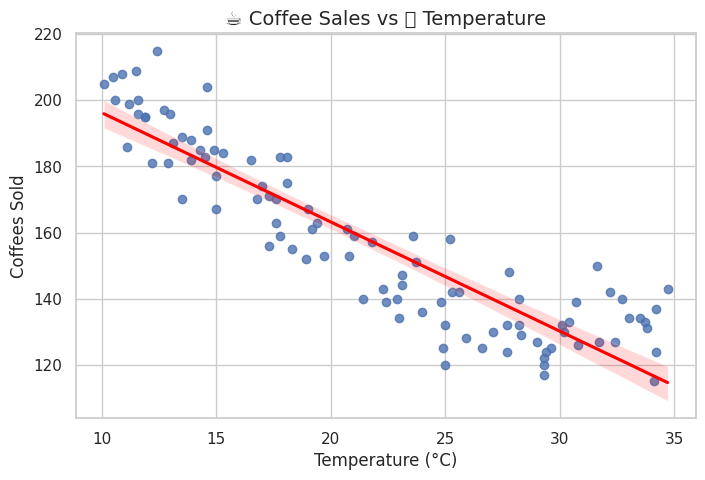

RMSE: 10.54
R² Score: 0.86
Model and metrics logged successfully to MLflow.
🏃 View run sharp_basin_m6bmcspz at: https://eastus.api.azureml.ms/mlflow/v2.0/subscriptions/3de63bf4-fc7c-490a-abfb-09a6982b2a30/resourceGroups/coffee-shop-project/providers/Microsoft.MachineLearningServices/workspaces/ws-coffee-shop/#/experiments/d35533db-cdde-4874-86ea-ad3d5e28c163/runs/b94bea60-e1f1-43a8-bb7f-1dc49a638d2f
🧪 View experiment at: https://eastus.api.azureml.ms/mlflow/v2.0/subscriptions/3de63bf4-fc7c-490a-abfb-09a6982b2a30/resourceGroups/coffee-shop-project/providers/Microsoft.MachineLearningServices/workspaces/ws-coffee-shop/#/experiments/d35533db-cdde-4874-86ea-ad3d5e28c163


2025/05/07 21:56:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [2]:
# ☕ Predicting Coffee Sales Based on Temperature

# This notebook demonstrates how to build a simple regression model
# to predict daily coffee sales based on temperature data.
# It includes data loading, visualization, training, evaluation, and MLflow logging.

# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import mlflow
import mlflow.sklearn

# 📂 Load the dataset
# Make sure the CSV file is in your working directory or provide the full path.
df = pd.read_csv("coffee_sales_data.csv")

# Show the first few rows of the dataset to understand its structure.
df.head()

# 📊 Visualize the relationship between temperature and coffee sales
# This helps to visually confirm any correlation between the two variables.

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x='temperature_celsius', y='coffee_sales', data=df, line_kws={"color": "red"})
plt.title('☕ Coffee Sales vs 🌡️ Temperature', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Coffees Sold')
plt.show()

# 🔄 Prepare the data for training
# We define the feature (X) as temperature and the label (y) as coffee sales.
X = df[['temperature_celsius']]
y = df['coffee_sales']

# Split the data into training and testing sets.
# 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train a Linear Regression model
# This model will learn the relationship between temperature and coffee sales.
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📝 Log model and metrics using MLflow
# This allows experiment tracking and model versioning in a reproducible way.
with mlflow.start_run():
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(model, "coffee_sales_model")
    print("Model and metrics logged successfully to MLflow.")
